# Regression
Using the sklearn make_regression and make_friedman
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_friedman1.html#sklearn.datasets.make_friedman1

In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def f(x): return -x**2 + np.random.normal(0, 2)

In [55]:
xs = np.array(list(range(-100, 100))) / 10
ys = [f(x) for x in xs]

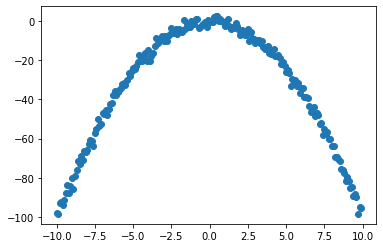

In [56]:
plt.scatter(xs, ys)

In [60]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [70]:

x_train, x_test, y_train, y_test = train_test_split(list(xs), list(ys), test_size=.3)

In [74]:
model = keras.models.Sequential([keras.layers.Dense(128, activation=tf.nn.relu, input_shape=[1]),
                                keras.layers.Dense(32, activation=tf.nn.relu),
                                keras.layers.Dense(1)])

model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=1e-3, decay=1e-3 / 200))

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, batch_size=100, verbose=2)

Epoch 1/1000
2/2 - 1s - loss: 1941.6964 - val_loss: 2149.5127 - 630ms/epoch - 315ms/step
Epoch 2/1000
2/2 - 0s - loss: 1921.1754 - val_loss: 2127.7688 - 70ms/epoch - 35ms/step
Epoch 3/1000
2/2 - 0s - loss: 1902.2734 - val_loss: 2106.6497 - 66ms/epoch - 33ms/step
Epoch 4/1000
2/2 - 0s - loss: 1884.6826 - val_loss: 2085.1775 - 59ms/epoch - 29ms/step
Epoch 5/1000
2/2 - 0s - loss: 1866.2128 - val_loss: 2064.4189 - 62ms/epoch - 31ms/step
Epoch 6/1000
2/2 - 0s - loss: 1847.5151 - val_loss: 2044.2375 - 62ms/epoch - 31ms/step
Epoch 7/1000
2/2 - 0s - loss: 1829.8684 - val_loss: 2024.1083 - 59ms/epoch - 30ms/step
Epoch 8/1000
2/2 - 0s - loss: 1812.4426 - val_loss: 2003.1138 - 63ms/epoch - 31ms/step
Epoch 9/1000
2/2 - 0s - loss: 1793.7578 - val_loss: 1981.1537 - 62ms/epoch - 31ms/step
Epoch 10/1000
2/2 - 0s - loss: 1774.7996 - val_loss: 1958.7369 - 58ms/epoch - 29ms/step
Epoch 11/1000
2/2 - 0s - loss: 1755.7509 - val_loss: 1937.1166 - 58ms/epoch - 29ms/step
Epoch 12/1000
2/2 - 0s - loss: 1736.697

In [75]:
predicted_total = model.predict(list(xs))

7/7 [==============================] - 0s 1ms/step


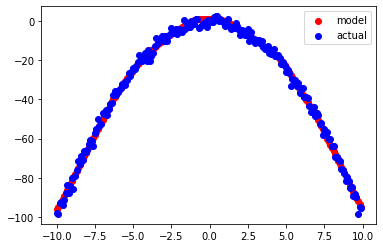

In [83]:
plt.scatter(xs, predicted_total, c="r", label="model")
plt.scatter(xs, ys, c="b", label="actual")
# plt.xlim(-2.5, 2.5)
plt.legend()
plt.show()

## Make it into a function
why not?

In [93]:
def model_arbitrary_function(f, bounds=(-10, 10), samples=100):
    """
    f: arbitrary function with arity=1 where f(x) -> y
    bounds: tuple denoting bounds across the x dimension where bounds[0] < bounds[1]
    samples: n samples to draw from f 
    """
    assert bounds[0] < bounds[1]
    xs = np.arange(bounds[0], bounds[1], (bounds[1] - bounds[0]) / samples)
    ys = [f(x) for x in xs]
    
    x_train, x_test, y_train, y_test = train_test_split(list(xs), list(ys), test_size=.3)
    
    model = keras.models.Sequential([keras.layers.Dense(128, activation=tf.nn.relu, input_shape=[1]),
                                keras.layers.Dense(32, activation=tf.nn.relu),
                                keras.layers.Dense(1)])
    
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=1e-3, decay=1e-3 / 200))
    
    es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

    print("Training")
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10000, batch_size=100, verbose=2)
    
    return model, xs, ys

Training
Epoch 1/10000
1/1 - 0s - loss: 34882.1758 - val_loss: 28315.2871 - 478ms/epoch - 478ms/step
Epoch 2/10000
1/1 - 0s - loss: 34847.8242 - val_loss: 28281.1953 - 57ms/epoch - 57ms/step
Epoch 3/10000
1/1 - 0s - loss: 34813.9688 - val_loss: 28247.9375 - 66ms/epoch - 66ms/step
Epoch 4/10000
1/1 - 0s - loss: 34780.9375 - val_loss: 28214.7461 - 72ms/epoch - 72ms/step
Epoch 5/10000
1/1 - 0s - loss: 34747.9648 - val_loss: 28182.1230 - 66ms/epoch - 66ms/step
Epoch 6/10000
1/1 - 0s - loss: 34715.5352 - val_loss: 28153.7266 - 57ms/epoch - 57ms/step
Epoch 7/10000
1/1 - 0s - loss: 34687.2969 - val_loss: 28128.8184 - 59ms/epoch - 59ms/step
Epoch 8/10000
1/1 - 0s - loss: 34662.5508 - val_loss: 28103.8535 - 81ms/epoch - 81ms/step
Epoch 9/10000
1/1 - 0s - loss: 34637.7500 - val_loss: 28078.8145 - 52ms/epoch - 52ms/step
Epoch 10/10000
1/1 - 0s - loss: 34612.8711 - val_loss: 28054.0586 - 55ms/epoch - 55ms/step
Epoch 11/10000
1/1 - 0s - loss: 34588.2695 - val_loss: 28030.1875 - 51ms/epoch - 51ms/st

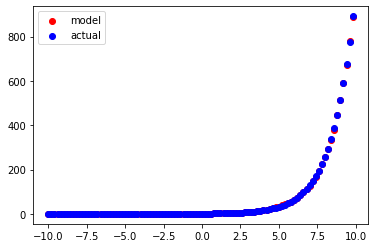

In [94]:
model, domain, actual = model_arbitrary_function(lambda x: 2**x)

predicted = model.predict(domain)
plt.scatter(domain, predicted, c="r", label="model")
plt.scatter(domain, actual, c="b", label="actual")

plt.legend()
plt.show()

In [95]:
model.save("models/2tothex.h5")